# 4.5.19. Improving the H$_2^+$ Variational Approximation by Including Polarization Functions

## 4.5.19.1. Motivation:

Both the linear combination of atomic orbital (LCAO), and Slater orbital descriptions of the H$_2^+$ molecule that we saw in INSERT LINK(S) TO PREVIOUS NOTES give reasonable approximations of bond formation. However, these models lack quantitative accuracy and some of the intuitive qualitative character describing how orbitals might change near bond distance. The Slater type orbital modifies the LCAO basis by improving the existing exponential function representative of the Hydrogen 1s orbital. In these notes, we will improve upon that basis by adding a function which allows for dileniation of the orbitals from strict spherical structure (polarization functions). 

## 4.5.19.2 Learning Goals:

After working through these notes, you will be able to:

1. Define the difference between Hydrogen atom 1s, Slater 1s, and Slater 2p$_z$ orbitals. 
2. Describe how the addition of Slater 2p$_z$ orbitals allows us to get an improved variational result for the H$_2^+$ molecule as compared to only utilizing hydrogen-atom or Slater 1s orbitals.
3. Describe what it means to include polarization functions in atomic orbitals, and how optimizing the polarized basis set provides insight to the structure of a real chemical bond.

## 4.5.19.3. Coding Concepts: 

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concetps/plotting_with_matplotlib.ipynb)

## 4.5.19.4. Setting up the Model

We consider the H$_2^+$ molecule in the Born-Oppenheimer approximation with Hamiltonian
\begin{equation}
\hat{H} = -\frac{1}{2}\nabla^2 - \frac{1}{r_A} - \frac{1}{r_B} + \frac{1}{R}
\end{equation}
where $r_A$ and $r_B$ are the distances between the electron and nuclei $A$ and $B$, respectively, and $R$ is the distance between the two nuclei.

In order to solve for the energy and wavefunction as a function of nuclear separation distance $R$, we will consider the normalized trial wave function
\begin{equation}
\psi_+ = \frac{1}{\sqrt{2(1+S_{AB})}}\left( \phi_A + \phi_B \right)
\end{equation}
where $\phi_A$ and $\phi_B$ are the atom-centered basis functions and $S_{AB}$ is the basis overlap integral defined by
\begin{equation}
S_{AB} = \left\langle \phi_A \mid \phi_B\right\rangle.
\end{equation}

Note that thus far, the setup to the problem aligns exactly with the LCAO and Slater bases. Remember that in these notes, we will consider going beyond the minimal $1s$ atomic basis by including $2p_z$ functions to allow for *polarization*.

## 4.5.19.5. Adding Polarization

Polarization will be added to our atomic centered basis functions in the form of a linear combination of $1s$ and $2p_z$ slater-type orbitals (STOs) on each nucleus. Though the $2p_z$ functions we utilize also come from STOs, the term "Slater" will be used here on to denote the Slater $1s$ only basis set. Thus, the normalized basis functions are:
\begin{align}
\phi_A &= \frac{1}{\sqrt{1+a^2}}\left(1s_A + a\cdot2p_{zA}\right) \\
\phi_B &= \frac{1}{\sqrt{1+a^2}}\left(1s_B + a\cdot2p_{zB}\right)
\end{align}
where $a$ is a variational paramter that controls the amount of $p$ character in the molecular orbital, $1s_A$ is the $1s$ STO centered on nucleus $A$ and $2p_{zA}$ is the $2p_z$ STO centered on nucleus $A$. Let us take a moment to discuss the addition of the $a$ parameter. As is central to the variational method, this parameter will need to be optimized, in this case for many discrete values of $R$. How do you think $a$ will change as $R$ changes? Will $a$ be highest near bonding distance, at infinite separation, or somewherre in between? We will discuss this further during the energy optimization steps, but it is good practice to consider this now.\
\
Next, we must define our $1s$ and $2p_Z$ functions. Note that the $1s$ functions look very similar to what we used for the Slater basis, with one notable change (try to spot and understand that change before checking below the functions for an explanation). The normalized functional forms of these are:
\begin{align}
1s_A &= \left( \frac{Z_1^3}{\pi}\right)^{1/2}e^{-Z_1r_A} \\
1s_B &= \left( \frac{Z_1^3}{\pi}\right)^{1/2}e^{-Z_1r_B} \\
2p_{zA} &= \left( \frac{Z_2^5}{\pi}\right)^{1/2} r_A\cos\theta_A e^{-Z_2r_A} \\
2p_{zB} &= \left( \frac{Z_2^5}{\pi}\right)^{1/2} r_B\cos\theta_B e^{-Z_2r_B}
\end{align}

If you looked back at the notes for the Slater type orbitals, you might have noticed that $Z$ was the only variational parameter related to effective nuclear charge. Here, we utilize $Z_1$ and $Z_2$ in order to allow our basis set to account for differing effective charge applied to the $1s$ and $2p_z$ orbitals. There are two major possibilities this addition introduces. First, that $Z_1$ and $Z_2$ do not differ, and we give ourselves extra work in calculating constants and scalar terms in the upcoming integrals. Second, that effective charge does vary between the orbital types in our model, and the extra consideration allows for a more accurate variational approximation. Remember that adding to the basis in this way is either neutral (not accounting for the extra legwork) or productive, it cannot act as a detriment to our overall approach. Spoiler alert: in this case it is productive, as we will show that $Z_1$ and $Z_2$ values vary widely from each other at most $R$ values in the optimized model.\
\
Now, we know our Hamiltonian and have described our basis set. As we did for the LCAO and Slater bases, We will start by determining an equation for the energy in terms of integrals, such as $S_{AB}$.  We will determine specific functional forms of those integrals in subsequent subsections.

## 4.5.19.5.1. Determining the Expectation of the Hamiltonian

We will determine the expectation value of the Hamiltonian in this basis.  Namely,
\begin{equation}
E_{\psi_+} = \left\langle \psi_+ \mid \hat{H} \mid \psi_+ \right\rangle
\end{equation}

Convince yourself that the equation above is an appropriate representation for the expectation value of the Hamiltonian (i.e. why do we not need to consider dividing by the overlap integral?). Continuing on, we will start by just separating the terms
\begin{align}
E_{\psi_+} &= \frac{1}{2(1+S_{AB})}\left\langle \phi_A + \phi_B \mid \hat{H} \mid \phi_A + \phi_B \right\rangle \\
&= \frac{1}{2(1+S_{AB})}\left[ \left\langle \phi_A \mid \hat{H} \mid \phi_A \right\rangle + \left\langle \phi_B \mid \hat{H} \mid \phi_B \right\rangle + \left\langle \phi_A \mid \hat{H} \mid \phi_B \right\rangle + \left\langle \phi_B \mid \hat{H} \mid \phi_A \right\rangle\right] \\
&= \frac{1}{(1+S_{AB})}\left[ \left\langle \phi_A \mid \hat{H} \mid \phi_A \right\rangle + \left\langle \phi_A \mid \hat{H} \mid \phi_B \right\rangle \right] \\
\end{align}

Consider how the Hermitian nature of our model, and real-valued basis set contribute to the manipulations made above (i.e. What if we did not use a Hermitian operator, or included functions with imaginary components?). \
\
We will determine expressions for these integrals below. Like much of the work we have done so far in this course, there is no single correct starting point or approach to evaluating individual integrals. For these notes, we will break up the hamiltonian across addition. Additionally, we will start with the $S_{AB}$ integral, as we will find it (or its substituents) pops up in some of the other integrations and will need to be called upon. 

### 4.5.19.5.1.1. $S_{AB}(Z_1,Z_2,a,R)$


\begin{align}
S_{AB}(Z1,Z2,a,R) &= \frac{1}{1+a^2}\left\langle 1s_A + a\cdot2p_{zA} \mid 1s_B+ a\cdot2p_{zB} \right\rangle \\
 &= \frac{1}{1+a^2}\left[ \left\langle 1s_A  \mid 1s_B \right\rangle + a\left\langle 1s_A  \mid 2p_{zB} \right\rangle + a\left\langle 2p_{zA} \mid 1s_B \right\rangle + a^2\left\langle 2p_{zA} \mid 2p_{zB} \right\rangle\right] \\
  &= \frac{1}{1+a^2}\left[ S_{1s-1s}(Z_1,R) + 2aS_{1s-2p}(Z_1,Z_2,R) + a^2S_{2p-2p}(Z_2,R)\right] 
\end{align}
Here, we see that the $S_{AB}$ integral breaks into three distinct overlap ($S$ ) functions. The functional forms of these integrals are described in a table later in these notes. You can also check out the functions and how they are expressed/nested in the code below, which we will eventually compile for energy minimization (and to call upon $S_{AB}$ for other integrals). 

In [1]:
import numpy as np

THRESH = 1e-8

def S_1s(Z,R):
    w = Z*R
    return np.exp(-w)*(1+ w + w*w/3)

def S_2p(Z,R):
    w = Z*R
    return np.exp(-w)/15*(w**4 + 2*w**3 - 3*w**2 - 15*w - 15)

def S_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z2-Z1)*R
    if abs(Z2-Z1) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2 * (np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3 * ( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) )
        I4 = 2/beta**4 * ( 3*(beta**2+2)*np.sinh(beta) - beta*(beta**2 + 6)*np.cosh(beta)) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
        I4 = 0
    I5 = np.exp(-alpha)/alpha
    I6 = I5 * (alpha+1)/alpha
    I7 = I5 * (alpha*(alpha+2)+2)/alpha**2
    I8 = I5 * (alpha*(alpha*(alpha+3)+6)+ 6)/alpha**3
    return Z1**1.5*Z2**2.5*R**4/8 * (I1*I7 + I2*I8 - I3*I5 - I4*I6)

def S_AB(Z1,Z2,a,R):
    return (S_1s(Z1,R) + a**2*S_2p(Z2,R) + 2*a*S_1s_2p(Z1,Z2,R))/(1+a**2)

We have discussed in class before how checking your functions along the way while doing such involved and numerous integrations can be useful to ensure you are not baking incorrect functions into your code from the beginning. Below, we plot each of our individual $S$-type functions, and the combined $S_{AB}$ function with a chosen $a$ value. 

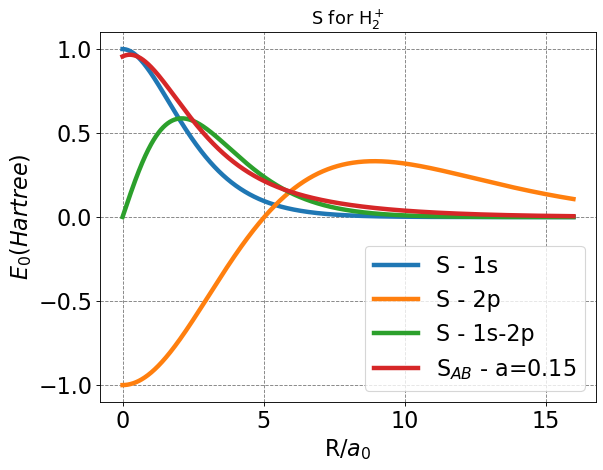

In [2]:
import matplotlib.pyplot as plt
R = np.arange(0.001,16,0.01)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
S_1s_basis = S_1s(1,R)
S_2p_basis = S_2p(0.5,R)
S_1s_2p_basis = S_1s_2p(1,1,R)
S_combined = S_AB(1,0.5,0.15,R) 
plt.plot(R,S_1s_basis,lw=4, label=r'S - 1s')
plt.plot(R,S_2p_basis,lw=4, label=r'S - 2p')
plt.plot(R,S_1s_2p_basis,lw=4, label=r'S - 1s-2p')
plt.plot(R,S_combined,lw=4, label=r'S$_{AB}$ - a=0.15')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.2)
plt.legend(fontsize=20)
plt.title(r'S for H$_2^+$',fontsize=16);

After plotting, everything seems in order, and several characteristics help us to corroborate. First, we expect all overlap functions to approach zero as $R$ approaches infinity. From our previous experience with $1s$ orbitals, we expect the $1s$ overlap to approach one as $R$ approaches zero. One feature that may not be as readily understood is the $2p_Z$ overlap behavior. Since p-orbitals have parity (positive and negative, or bonding and anti-bonding lobes), and we aim to simulate bonding, the lobes of opposite parity will overlap at $R=0$, leading to a value of $-1$.\
\
This plot also gives us some initial physical insight to how this model improves upon the LCAO and Slater basis. Note that the overall overlap increases faster than for the Slater overlap as R decreases from infinity, signaling stronger interactions at larger nuclear separation. \
\
Now, we will move on to expanding and solving $\left\langle \phi_A \mid \hat{H} \mid \phi_A \right\rangle$.

### 4.5.19.5.1.2. $\left\langle \phi_A \mid \hat{H} \mid \phi_A \right\rangle$

\begin{align}
\left\langle \phi_A \mid \hat{H} \mid \phi_A \right\rangle &= \left\langle \phi_A \mid -\frac{1}{2}\nabla^2 \mid \phi_A \right\rangle + \left\langle \phi_A \mid -\frac{1}{r_A} \mid \phi_A \right\rangle + \left\langle \phi_A \mid -\frac{1}{r_B} \mid \phi_A \right\rangle + \left\langle \phi_A \mid \frac{1}{R} \mid \phi_A \right\rangle \\
 &= T_{AA}(Z_1,Z_2,a) + J_{AA}(Z_1,Z_2,a) + J_{AB}(Z_1,Z_2,a,R) + \frac{1}{R}
\end{align}

#### 4.5.19.5.1.2.1. $T_{AA}(Z_1,Z_2,a)$

\begin{align}
T_{AA}(Z_1,Z_2,a) &= \left\langle \phi_A \mid -\frac{1}{2}\nabla^2 \mid \phi_A \right\rangle \\
&= \frac{1}{1+a^2}\left\langle 1s_A + a\cdot2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 1s_A + a\cdot2p_{zA} \right\rangle \\
&= \frac{1}{1+a^2}\left[ \left\langle 1s_A  \mid -\frac{1}{2}\nabla^2 \mid 1s_A \right\rangle + a\left\langle 1s_A  \mid -\frac{1}{2}\nabla^2 \mid 2p_{zA} \right\rangle + a\left\langle 2p_{zA}  \mid -\frac{1}{2}\nabla^2 \mid 1s_A \right\rangle + a^2\left\langle 2p_{zA}  \mid -\frac{1}{2}\nabla^2 \mid 2p_{zA} \right\rangle\right]
\end{align}

We will need:
\begin{align}
-\frac{1}{2}\nabla^2e^{-Z_1r_A} &= \left(\frac{Z_1}{r_A} - \frac{Z_1^2}{2}\right)e^{-Z_1r_A} \\
\left(-\frac{1}{2}\nabla^2\right) r_A\cos\theta_A e^{-Z_2r_A} &=\left[2Z_2-\frac{Z_2^2r_A}{2} \right]\cos\theta_A e^{-Z_2r_A}
\end{align}
\
The otuputs (above) of operating the kinetic energy term on the $1s$ and $2p_z$ are useful for the following, and later on in our calculations.
\
\
\begin{align}
\left\langle 1s_A \mid -\frac{1}{2}\nabla^2 \mid 1s_A \right\rangle =& \left( \frac{Z_1^3}{\pi}\right) \int_0^\infty\int_0^{2\pi}\int_0^\pi r_A^2\sin\theta_Ae^{-Z_1r_A}\left(-\frac{1}{2}\nabla^2\right) e^{-Z_1r_A}  dr_A d\theta_A d\phi_A \\
=& \frac{Z_1^2}{2} 
\end{align}
\
\
\
\begin{align}
\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 1s_A \right\rangle &= \left( \frac{Z_1^{3/2}Z_2^{5/2}}{\pi}\right) \int_0^\infty\int_0^{2\pi}\int_0^\pi r_A^2\sin\theta_Ar_A\cos\theta_A e^{-Z_2r_A}\left(-\frac{1}{2}\nabla^2\right) e^{-Z_1r_A}  dr_A d\theta_A d\phi_A \\
=& 0
\end{align}
\
\
\
\begin{align}
\left\langle 1s_{A} \mid -\frac{1}{2}\nabla^2 \mid 2p_{zA} \right\rangle &= \left( \frac{Z_1^{3/2}Z_2^{5/2}}{\pi}\right) \int_0^\infty\int_0^{2\pi}\int_0^\pi r_A^2\sin\theta_A  e^{-Z_1r_A}\left(-\frac{1}{2}\nabla^2\right)  r_A\cos\theta_A e^{-Z_2r_A}dr_A d\theta_A d\phi_A \\
&= 0
\end{align}
Both of the above follow because
\begin{align}
\int_0^\pi\sin\theta\cos\theta d\theta = 0
\end{align}
\
\begin{align}
\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 2p_{zA} \right\rangle &= \left( \frac{Z_2^5}{\pi}\right) \int_0^\infty\int_0^{2\pi}\int_0^\pi r_A^3\sin\theta_A\cos^2\theta_A e^{-2Z_2r_A}  \left[2Z_2-\frac{Z_2^2r_A}{2} \right] dr_A d\theta_A d\phi_A \\
&=  \frac{Z_2^2}{2}  
\end{align}

Thus:

\begin{align}
T_{AA}(Z_1,Z_2,a) &= \frac{Z_1^2+a^2Z_2^2}{2(1+a^2)}
\end{align}

In [3]:
def T_AA(Z1,Z2,a):
    return (Z1**2 + a**2 * Z2**2)/(2 * (1 + a**2))

#### 4.5.19.5.1.2.2. $J_{AA}(Z_1,Z_2,a)$


\begin{align}
J_{AA}(Z_1,Z_2,a) &= \left\langle \phi_A \mid -\frac{1}{r_A} \mid \phi_A \right\rangle \\
&= \frac{1}{1+a^2}\left\langle 1s_A + a\cdot2p_{zA} \mid -\frac{1}{r_A} \mid 1s_A + a\cdot2p_{zA} \right\rangle \\
&= \frac{1}{1+a^2}\left[ \left\langle 1s_A  \mid -\frac{1}{r_A} \mid 1s_A \right\rangle + a\left\langle 1s_A  \mid -\frac{1}{r_A} \mid 2p_{zA} \right\rangle + a\left\langle 2p_{zA}  \mid -\frac{1}{r_A} \mid 1s_A \right\rangle + a^2\left\langle 2p_{zA}  \mid -\frac{1}{r_A} \mid 2p_{zA} \right\rangle\right]
\end{align}

This middle two terms will again be zero for the same argument as the $T$.

\begin{align}
\left\langle 1s_A \mid -\frac{1}{r_A} \mid 1s_A \right\rangle =& \left( \frac{Z_1^3}{\pi}\right) \int_0^\infty\int_0^{2\pi}\int_0^\pi r_A^2\sin\theta_Ae^{-Z_1r_A}\left(-\frac{1}{r_A}\right) e^{-Z_1r_A}  dr_A d\theta_A d\phi_A \\
=& -Z_1 
\end{align}

\begin{align}
\left\langle 2p_{zA} \mid -\frac{1}{r_A} \mid 2p_{zA} \right\rangle &= -\left( \frac{Z_2^5}{\pi}\right) \int_0^\infty\int_0^{2\pi}\int_0^\pi r_A^3\sin\theta_A\cos^2\theta_A e^{-2Z_2r_A}  dr_A d\theta_A d\phi_A \\
&=  -\frac{Z_2}{2} 
\end{align}

Thus,
\begin{align}
J_{AA}(Z_1,Z_2,a) &=  \frac{-1}{1+a^2}\left[ Z_1  + a^2\frac{Z_2}{2}\right]
\end{align}

In [4]:
def J_AA(Z1,Z2,a):
    return -(Z1 + 0.5*a**2*Z2)/(1+a**2)

#### 4.5.19.5.1.2.3. $J_{AB}(Z_1,Z_2,a,R)$

$\left\langle \phi_A \mid -\frac{1}{r_B} \mid \phi_A \right\rangle$

\begin{align}
J_{AB}(Z_1,Z_2,a,R) &= \left\langle \phi_A \mid -\frac{1}{r_B} \mid \phi_A \right\rangle \\
&= \frac{1}{1+a^2}\left\langle 1s_A + a\cdot2p_{zA} \mid -\frac{1}{r_B} \mid 1s_A + a\cdot2p_{zA} \right\rangle \\
&= \frac{1}{1+a^2}\left[ \left\langle 1s_A  \mid -\frac{1}{r_B} \mid 1s_A \right\rangle + a\left\langle 1s_A  \mid -\frac{1}{r_B} \mid 2p_{zA} \right\rangle + a\left\langle 2p_{zA}  \mid -\frac{1}{r_B} \mid 1s_A \right\rangle + a^2\left\langle 2p_{zA}  \mid -\frac{1}{r_B} \mid 2p_{zA} \right\rangle\right] \\
&= \frac{1}{1+a^2}\left[ \left\langle 1s_A  \mid -\frac{1}{r_B} \mid 1s_A \right\rangle + 2a\left\langle 1s_A  \mid -\frac{1}{r_B} \mid 2p_{zA} \right\rangle + a^2\left\langle 2p_{zA}  \mid -\frac{1}{r_B} \mid 2p_{zA} \right\rangle\right] \\
&= \frac{J_{1s-1s}(Z1,R) + 2aJ_{1s-2p}(Z1,Z2,R) + a^2J_{2p-2p}(Z2,R)}{1+a^2}
\end{align}
\
Note that from $J_{AB}$, we derive three distinct coulomb, or $J$ functions, one for each distinct orbital combination ($1s$ with $1s$, $1s$ with $2p_z$, and $2p_z$ with $2p_z$). Each coulomb integral's functional form can be found in the aforementioned table later, or in the hidden code directly below.

In [5]:
import numpy as np

def J_1s(Z,R):
    w = Z*R
    return Z*(np.exp(-2*w)*(1+1/w) - 1/w)

def J_2p(Z,R):
    w = Z*R
    I1 = 2/w*np.sinh(w)
    I2 = 2/w**2 * (np.sinh(w) - w*np.cosh(w))
    I3 = 2/w**3 * (np.sinh(w)*(w**2+2) - 2*w*np.cosh(w))
    I4 = 2/w**4 * (np.sinh(w)*(3*w**2+6) - np.cosh(w)*(w**3+6*w))
    I5 = np.exp(-w)/w
    I6 = I5/w * (w + 1)
    I7 = I5/w**2 * (w**2 + 2*w + 2)
    I8 = I5/w**3 * (w**3 + 3*w**2 + 6*w + 6)
    return -Z*w**4/8 * (I5*I2 + (I1 + 2*I3)*I6 + I7*(I4 + 2*I2) + I3*I8)

def J_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    I1 = 2*np.sinh(alpha)/alpha
    I2 = 2/alpha**2*(np.sinh(alpha)-alpha*np.cosh(alpha))
    I3 = 2/alpha**3*( (alpha**2+2)*np.sinh(alpha) - 2*alpha*np.cosh(alpha) )
    I4 = np.exp(-alpha)/alpha
    I5 = (alpha+1)*np.exp(-alpha)/alpha**2
    I6 = (alpha*(alpha+2)+2)*np.exp(-alpha)/alpha**3
    return -0.25*Z1**1.5*Z2**2.5*R**3 * (I2*I4 + (I1+I3)*I5 + I2*I6)

def J_AB(Z1,Z2,a,R):
    return (J_1s(Z1,R) + 2*a*J_1s_2p(Z1,Z2,R) + a**2*J_2p(Z2,R))/(1+a**2)

As with our $S$ integrals, it is useful to plot the $J$ integral functions to see if each function behaves appropriately as written. For these integrals, the main features we will consider are end behavior (values for R near bonding distance, zero, and infite separation).

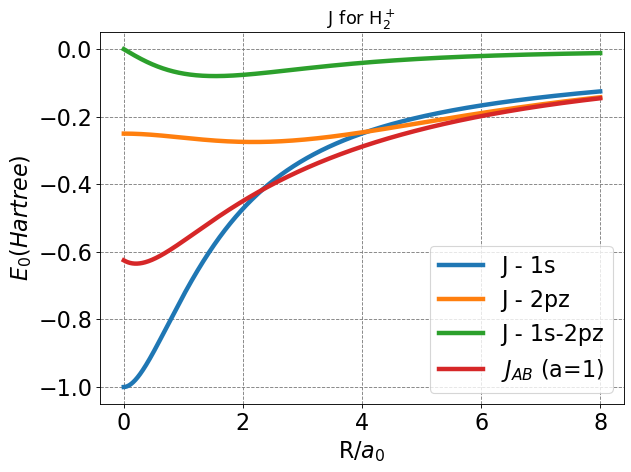

In [6]:
import matplotlib.pyplot as plt
R = np.arange(0.001,8,0.001)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
J_1s_basis = J_1s(1,R)
J_2p_basis = J_2p(0.5,R)
J_1s_2p_basis = J_1s_2p(1,0.5,R)
J_combined = J_AB(1,0.5,1,R)
plt.plot(R,J_1s_basis,lw=4, label=r'J - 1s')
plt.plot(R,J_2p_basis,lw=4, label=r'J - 2pz')
plt.plot(R,J_1s_2p_basis,lw=4, label=r'J - 1s-2pz')
plt.plot(R,J_combined,lw=4, label=r'$J_{AB}$ (a=1)')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.2)
plt.legend(fontsize=20)
plt.title(r'J for H$_2^+$',fontsize=16)
plt.tight_layout()
plt.show();

Here, we see that each function seems to approach zero at infinite separation, intuitive since coulombic interactions decay exponentially as separation distance increases. Near zero, each function approaches a finite value. \
\
Next, we will consider $\left\langle \phi_A \mid \hat{H} \mid \phi_B \right\rangle$.

### 4.5.19.5.1.3. $\left\langle \phi_A \mid \hat{H} \mid \phi_B \right\rangle$.

\begin{align}
\left\langle \phi_A \mid \hat{H} \mid \phi_B \right\rangle &= \left\langle \phi_A \mid -\frac{1}{2}\nabla^2 \mid \phi_B \right\rangle + \left\langle \phi_A \mid -\frac{1}{r_A} \mid \phi_B \right\rangle + \left\langle \phi_A \mid -\frac{1}{r_B} \mid \phi_B \right\rangle + \left\langle \phi_A \mid \frac{1}{R} \mid \phi_B \right\rangle \\
 &= T_{AB}(Z_1,Z_2,a,R) + 2K_{AB}(Z_1,Z_2,a,R)  + \frac{S(Z_1,Z_2,a,R)}{R}
\end{align}
\
For this section of calculations, we will tackle $K_{AB}$ first, as it will allow us to identify simplifications in the $T_{AB}$ calculations. 

#### 4.5.19.5.1.3.1. $K_{AB}(Z_1,Z_2,a,R)$


\begin{align}
K_{AB}(Z1,Z2,a,R) &= \frac{1}{1+a^2}\left\langle 1s_A + a\cdot2p_{zA} \mid -\frac{1}{r_B} \mid 1s_B+ a\cdot2p_{zB} \right\rangle \\
 &= \frac{1}{1+a^2}\left[ \left\langle 1s_A \mid -\frac{1}{r_B} \mid 1s_B \right\rangle + a\left\langle 1s_A  \mid -\frac{1}{r_B} \mid 2p_{zB} \right\rangle + a\left\langle 2p_{zA} \mid -\frac{1}{r_B} \mid 1s_B \right\rangle + a^2\left\langle 2p_{zA} \mid -\frac{1}{r_B} \mid 2p_{zB} \right\rangle\right] \\
  &= \frac{1}{1+a^2}\left[ K_{1s-1s}(Z_1,R) + aK_{2p-1s}(Z_1,Z_2,R) + aK_{1s-2p}(Z_1,Z_2,R) + a^2K_{2p-2p}(Z_2,R)\right] \\
  &= \frac{1}{1+a^2}\left[ K_{1s-1s}(Z_1,R) + a\left(K_{2p-1s}(Z_1,Z_2,R) + K_{1s-2p}(Z_1,Z_2,R)\right) + a^2K_{2p-2p}(Z_2,R)\right] \\
\end{align}\
\
Note that the exchange functions ($K$) come out of the $K_{AB}$ calculations, where orbitals on opposite nuclei are subject to the $-1/r_A$ or $-1/r_B$ operators. The functional forms of all exchange integrals can be found in the aforementioned table, or in the code cell directly below. 

In [7]:
import numpy as np
THRESH=1e-8
def K_1s(Z, R):
    w = Z*R
    return -Z*np.exp(-w)*(1+w)

def K_2p(Z,R):
    w = Z*R
    I1 = np.exp(-w)*(w+1)/(w*w)
    I2 = np.exp(-w)/(w**4)*(w**3+3*w**2 + 6*w + 6)
    return -Z*w**4/8*(2*I1 - 2/3*I2)

def K_2p_1s(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z1-Z2)*R
    if abs(Z1-Z2) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2*(np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3*( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) ) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
    I4 = np.exp(-alpha)/alpha
    I5 = I4 * (alpha+1)/alpha
    I6 = I4 * (alpha*(alpha+2)+2)/alpha**2
    return -0.25*Z1**1.5*Z2**2.5*R**3*( I5*(I1+I3) - I2*(I4+I6) )

def K_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z1-Z2)*R
    if abs(Z1-Z2) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2*(np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3*( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) ) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
    I4 = np.exp(-alpha)/alpha
    I5 = I4 * (alpha+1)/alpha
    I6 = I4 * (alpha*(alpha+2)+2)/alpha**2
    return -0.25*Z1**1.5*Z2**2.5*R**3*( I5*(I1-I3) + I2*(I4-I6) )

def K_AB(Z1,Z2,a,R):
    return (K_1s(Z1,R) + a*(K_1s_2p(Z1,Z2,R) + K_2p_1s(Z1,Z2,R)) + a**2*K_2p(Z2,R))/(1+a**2)

Once again, it is prudent to plot our notable functions (in this case the exchange functions) to determine if anything seems incorrect offhand. Since we do not cover the exchange function behavior in great detail, it will suffice to check for appropriate end behavior.

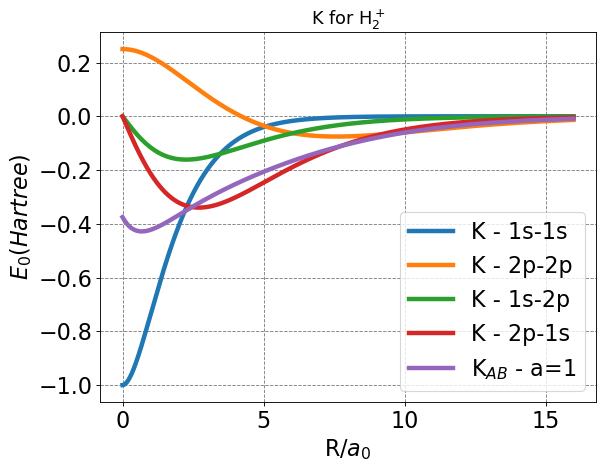

In [8]:
import matplotlib.pyplot as plt
R = np.arange(0.001,16,0.01)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
K_1s_basis = K_1s(1,R)
K_2p_basis = K_2p(0.5,R)
K_1s_2p_basis = K_1s_2p(1,0.5,R)
K_2p_1s_basis = K_2p_1s(1,0.5,R)
K_combined = K_AB(1,0.5,1,R)
plt.plot(R,K_1s_basis,lw=4, label=r'K - 1s-1s')
plt.plot(R,K_2p_basis,lw=4, label=r'K - 2p-2p')
plt.plot(R,K_1s_2p_basis,lw=4, label=r'K - 1s-2p')
plt.plot(R,K_2p_1s_basis,lw=4, label=r'K - 2p-1s')
plt.plot(R,K_combined,lw=4, label=r'K$_{AB}$ - a=1')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.2)
plt.legend(fontsize=20)
plt.title(r'K for H$_2^+$',fontsize=16);

After plotting, everything seems in order given that each exchange function approaches a finite value at bonding distance, and zero at infinite separation. \
\
Next, we will look at $T_{AB}$, which will call upon the $K$ function we have established, so it is good we already checked them and nested them in our code. 

#### 4.5.19.5.1.3.2. $T_{AB}(Z1,Z2,a,R)$
\begin{align}
T_{AB}(Z1,Z2,a,R) &= \frac{1}{1+a^2}\left\langle 1s_A + a\cdot2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 1s_B+ a\cdot2p_{zB} \right\rangle \\
 &= \frac{1}{1+a^2}\left[ \left\langle 1s_A \mid -\frac{1}{2}\nabla^2 \mid 1s_B \right\rangle + a\left\langle 1s_A  \mid -\frac{1}{2}\nabla^2 \mid 2p_{zB} \right\rangle + a\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 1s_B \right\rangle + a^2\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 2p_{zB} \right\rangle\right]
\end{align}
\
We will work out the first of these to show how familiar functional forms pop out. Note specifically how we can use the operation of the kinetic energy operator on the $1s$ and $2p_z$ orbital functions we calculated earlier (see $T_{AA}$) to hasten this calculation and reduce it to familiar forms. \
\begin{align}
\left\langle 1s_A \mid -\frac{1}{2}\nabla^2 \mid 1s_B \right\rangle &= \left( \frac{Z_1^3}{\pi}\right) \int_{\text{all space}} e^{-Z_1r_A}\left(-\frac{1}{2}\nabla^2 \right) e^{-Z_1r_B}  d\vec{r} \\
&= \left( \frac{Z_1^3}{\pi}\right) \int_{\text{all space}} e^{-Z_1r_A}\left(\frac{Z_1}{r_B} - \frac{Z_1^2}{2}\right)e^{-Z_1r_B}  d\vec{r} \\
&= \left( \frac{Z_1^3}{\pi}\right) \left[ Z_1\int_{\text{all space}} \frac{e^{-Z_1(r_A+r_B)}}{r_B}d\vec{r} - \frac{Z_1^2}{2}\int_{\text{all space}} e^{-Z_1(r_A+r_B)}d\vec{r}  \right] \\
&= \left( \frac{Z_1^3}{\pi}\right) \left[ (Z_1)\frac{\pi}{Z_1^2}e^{-Z_1R}\left(Z_1R+1\right) - \frac{Z_1^2}{2}\frac{\pi e^{-Z_1R}}{3Z_1^3}\left(2Z_1^2R^2 + 3Z_1R + 3\right)  \right] \\
&= Z_1^2e^{-Z_1R}\left[ \frac{(Z_1)}{Z_1}\left(Z_1R+1\right) - \frac{1}{6}\left(2Z_1^2R^2 + 3Z_1R + 3\right)  \right] \\
&= -Z_1K_{1s-1s}-\frac{Z_1^2}{2}S_{1s-1s} \\
&= -Z_1\left(K_{1s-1s}+\frac{Z_1}{2}S_{1s-1s}\right)
\end{align}

$\left\langle 1s_A \mid -\frac{1}{2}\nabla^2 \mid 2p_{zB} \right\rangle$ Takes a similar form:

\begin{align}
\left\langle 1s_A \mid -\frac{1}{2}\nabla^2 \mid 2p_{zB} \right\rangle &= -Z_2\left(2K_{2pz-1s} + \frac{Z_2}{2}S_{1s-2pz} \right)
\end{align}

$\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 1s_B \right\rangle$ Takes a similar form as well:

\begin{align}
\left\langle 2p_{zA}\mid -\frac{1}{2}\nabla^2 \mid 1s_B \right\rangle &= -Z_1\left( K_{1s-2pz}+\frac{Z_1}{2}S_{2pz-1s} \right)
\end{align}

$\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 2p_{zB} \right\rangle$ Takes a similar form as well:

\begin{align}
\left\langle 2p_{zA} \mid -\frac{1}{2}\nabla^2 \mid 2p_{zB} \right\rangle &
&= -Z_2\left(2K_{2pz-2pz} + \frac{Z_2}{2}S_{2pz-2pz}\right)
\end{align}

Thus:
\begin{align}
T_{AB}(Z1,Z2,a,R) &= \frac{1}{1+a^2}\left[ -Z_1\left(K_{1s-1s}+\frac{Z_1}{2}S_{1s-1s}\right) -aZ_2\left(2K_{2pz-1s} + \frac{Z_2}{2}S_{1s-2pz} \right) -aZ_1\left( K_{1s-2pz}+\frac{Z_1}{2}S_{2pz-1s} \right) -a^2Z_2\left(2K_{2pz-2pz} + \frac{Z_2}{2}S_{2pz-2pz}\right)\right] \\
&= \frac{-1}{1+a^2}\left[ Z_1K_{1s-1s} + 2aZ_2K_{2pz-1s} + aZ_1K_{1s-2pz} + a^22Z_2K_{2pz-2pz} + \frac{Z_1^2}{2}S_{1s-1s} + a\frac{Z_2^2}{2}S_{1s-2pz} + a\frac{Z_1^2}{2}S_{2pz-1s}  + a^2\frac{Z_2^2}{2}S_{2pz-2pz}\right]\\
&= \frac{-1}{1+a^2}\left[ Z_1K_{1s-1s} + 2aZ_2K_{2pz-1s} + aZ_1K_{1s-2pz} + 2a^2Z_2K_{2pz-2pz} + \frac{Z_1^2}{2}S_{1s-1s} + \frac{aS_{1s-2pz}}{2} \left(Z_2^2 + Z_1^2\right) + a^2\frac{Z_2^2}{2}S_{2pz-2pz}\right]
\end{align}

In [9]:
def T_AB(Z1,Z2,a,R):
    prefactor = -1/(1+a**2)
    kterms = Z1*K_1s(Z1,R) + a*(2*Z2*K_2p_1s(Z1,Z2,R) + Z1*K_1s_2p(Z1,Z2,R)) + 2*a**2*Z2*K_2p(Z2,R)
    sterms = 0.5 * ( Z1**2*S_1s(Z1,R) + a*(Z2**2+Z1**2)*S_1s_2p(Z1,Z2,R) + a**2*Z2**2*S_2p(Z2,R) )
    return prefactor*(kterms+sterms)

## 4.5.19.5.2. Overlap, Coulomb, and Exchange Functions 
Before we get into compiling the total energy function, you have been promised a table outlining the functional forms of our $S$, $J$, and $K$, integrals/functions.

|  Function |              Integral                     |     Solution in H$_2^+$ Polarized Basis        |
| :-------- | :----------------------------------------- | :-------------------------------------------------- |
| $S_{1s}(Z_1,R)$  |  $S_{1s}(Z_1,R) = \left\langle 1s_A \mid \ 1s_B \right\rangle$ |  $S_{1s}(Z_1,R) = e^{-Z_1R}(1 + Z_1R + \frac{Z_1^2R^2}{3})$ |
| $S_{2p}(Z_2,R)$  | $S_{2p}(Z_2,R) = \left\langle 2p_{zA} \mid 2p_{zB} \right\rangle$ |  $S_{2p}(Z_2,R) = \frac{-Z_2R}{15}(Z_2^4R^4 + 2Z_2^3R^3 - 3Z_2^2R^2 - 15Z_2R - 15)$ |
| $S_{1s-2p}(Z_1,Z_2,R)$  | $S_{1s-2p}(Z_1,Z_2,R) = \left\langle 1s_A \mid 2p_{zB} \right\rangle = \left\langle 2p_{zA} \mid 1s_B \right\rangle$ |  $S_{1s-2p}(Z_2,R) = \frac{Z_1^{1.5}Z_2^{2.5}R^4}{8}(I_1I_7 + I_2I_8 - I_3I_5 - I_4I_6)$ |
| $J_{1s}(Z_1,R)$  | $J_{1s}(Z_1,R) = \left\langle 1s_A \mid -\frac{1}{r_B} \mid  1s_A \right\rangle$ |  $J_{1s}(Z_1,R) = Z_1(e^{-2Z_1R}(1+\frac{1}{Z_2R}) - \frac{1}{Z_1R})$ |
| $J_{2p}(Z_2,R)$  | $J_{2p}(Z_2,R) = \left\langle 2p_{zA} \mid -\frac{1}{r_B} \mid 2p_{zA} \right\rangle$ | $J_{2p}(Z_2,R) = \frac{-Z_2^5R^4}{8}(L_5L_2 + (L_1 + 2L_3)L_6 + L_7(L_4 + 2L_2) + L_3L_8)$ |
| $J_{1s-2p}(Z_1,Z_2,R)$  | $J_{1s-2p}(Z_1,Z_2,R) = \left\langle 1s_A \mid \frac{1}{r_B} \mid 2p_{zA} \right\rangle = \left\langle 2p_{zA} \mid -\frac{1}{r_B} \mid 1s_A \right\rangle$ |  $J_{1s-2p}(Z_1,Z_2,R) = -0.25Z_1^{1.5}Z_2^{2.5}R^3(M_2M_4 + (M_1+M_3)M_5 + M_2M_6)$ |
| $K_{1s}(Z_1, R)$  | $K_{1s}(Z_1,R) = \left\langle 1s_A \mid -\frac{1}{r_B} \mid  1s_B \right\rangle$ |  $K_{1s}(Z_1, R) = -Z_1e^{-Z_1R}(1+Z_1R)$ |
| $K_{2p}(Z_2,R)$  | $K_{2p}(Z_2,R) = \left\langle 2p_{zA} \mid -\frac{1}{r_B} \mid 2p_{zB} \right\rangle$ |  $K_{2p}(Z_2,R)= \frac{-Z_2^5R^4}{8}(2N_1 - \frac{2}{3}N_2)$ |
| $K_{1s-2p}(Z_1,Z_2,R)$  | $J_{1s-2p}(Z_1,Z_2,R) = \left\langle 1s_A \mid \frac{1}{r_B} \mid 2p_{zA} \right\rangle$ |  $K_{1s-2p}(Z_1,Z_2,R) = -0.25Z_1^{1.5}Z_2^{2.5}R^3(P_5(P_1-P_3) + P_2(P_4-P_6))$ |
| $K_{2p-1s}(Z_1,Z_2,R)$  | $J_{1s-2p}(Z_1,Z_2,R) = \left\langle 2p_{zA} \mid -\frac{1}{r_B} \mid 1s_A \right\rangle$ |  $K_{2p-1s}(Z_1,Z_2,R) = -0.25Z_1^{1.5}Z_2^{2.5}R^3(P_5(P_1+P_3) - P_2(P_4+P_6))$ |\

Where values for all I, L, M, N, and O functions can be found in the Appendix at the end of this section.

## 4.5.19.5.3. Total Energy 

Now the total energy combining all of the above is

\begin{align}
E_{\psi_+} &=  \frac{1}{(1+S_{AB})}\left[ \left\langle \phi_A \mid \hat{H} \mid \phi_A \right\rangle + \left\langle \phi_A \mid \hat{H} \mid \phi_B \right\rangle \right] \\
&= \frac{T_{AA}(Z_1,Z_2,a) + J_{AA}(Z_1,Z_2,a) + J_{AB}(Z_1,Z_2,a,R) + \frac{1}{R} + T_{AB}(Z_1,Z_2,a,R) + 2K_{AB}(Z_1,Z_2,a,R)  + \frac{S(Z_1,Z_2,a,R)}{R}}{(1+S_{AB}(Z_1,Z_2,a,R))} \\
&= \frac{T_{AA}(Z_1,Z_2,a) + J_{AA}(Z_1,Z_2,a) + J_{AB}(Z_1,Z_2,a,R) + T_{AB}(Z_1,Z_2,a,R) + 2K_{AB}(Z_1,Z_2,a,R)  }{(1+S_{AB}(Z_1,Z_2,a,R))} + \frac{1}{R}
\end{align}
\
\
And there you have it! Since we have already defined the functions called on by the monster of an equation above, we need only to define our variational parameters and return expectation values. To explore the code to do this, see the hidden cells below. If you do, you should note how simple the equation seems in the code for now, since it seems to consist of only a few lines of code (remember that each of the functions it calls is comprised of more functions). Later, we will compile all of the nested, pre-defined functions to one code cell which you will observe is much more robust. \
\
The first plot we will make to visualize our results simply assigns all of our variational parameters a discrete value, then plots the energy as a function of $R$. For reference, $Z_1=1.0$ and $Z_2=0.5$ for each depicted choice of $a$. 

In [10]:
def E_1s_2p(params,R):
    Z1 = params[0]
    Z2 = params[1]
    a = params[2]
    return (T_AA(Z1,Z2,a) + J_AA(Z1,Z2,a) + J_AB(Z1,Z2,a,R) + T_AB(Z1,Z2,a,R) + 2*K_AB(Z1,Z2,a,R))/(1+S_AB(Z1,Z2,a,R)) + 1/R

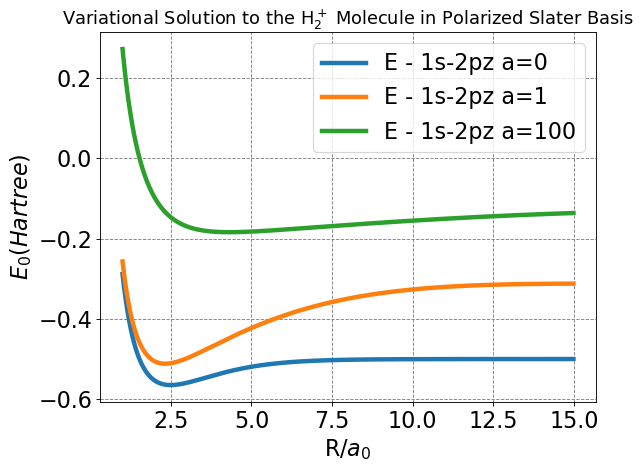

In [11]:
R = np.arange(1,15,0.01)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
E_1s_2p_basis_a_0 = np.empty(R.size)
E_1s_2p_basis_a_1 = np.empty(R.size)
E_1s_2p_basis_a_100 = np.empty(R.size)
for i, r in enumerate(R):
    E_1s_2p_basis_a_0[i] = E_1s_2p([1.0,0.5,0],r)
    E_1s_2p_basis_a_1[i] = E_1s_2p([1.0,0.5,1],r)
    E_1s_2p_basis_a_100[i] = E_1s_2p([1.0,0.5,100],r)
plt.plot(R,E_1s_2p_basis_a_0,lw=4, label=r'E - 1s-2pz a=0')
plt.plot(R,E_1s_2p_basis_a_1,lw=4, label=r'E - 1s-2pz a=1')
plt.plot(R,E_1s_2p_basis_a_100,lw=4, label=r'E - 1s-2pz a=100')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.1)
plt.legend(fontsize=20)
plt.title(r'Variational Solution to the H$_2^+$ Molecule in Polarized Slater Basis',fontsize=16);

Compare this plot to those produced for the LCAO and Slater bases, do any of the plotted curves look familiar (hint: look closely at the blue curve for $a=0$, and remember the $Z$ values we set). 

Next, we will write a code to optimize each of our variational parameters at many values of $R$. This is the most important plot we have made so far, as it will show us whether we achieved an energy function that improves upon the LCAO and Slater bases.

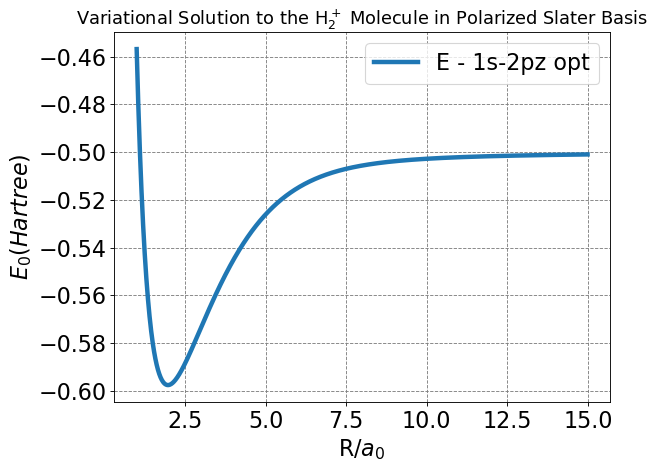

In [12]:
from scipy.optimize import minimize
R = np.arange(1,15,0.01)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
E_1s_2p_basis_opt = np.empty(R.size)
guess = np.array([1.0,0.5,1])
min_params = np.empty((R.size,3))
for i, r in enumerate(R):
    min_params[i] = minimize(E_1s_2p,guess,args=(r)).x
    E_1s_2p_basis_opt[i] = E_1s_2p(min_params[i],r)
    guess = min_params[i]
    
plt.plot(R,E_1s_2p_basis_opt,lw=4, label=r'E - 1s-2pz opt')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.1)
plt.legend(fontsize=20)
plt.title(r'Variational Solution to the H$_2^+$ Molecule in Polarized Slater Basis',fontsize=16);

In [13]:
from scipy.optimize import minimize
def E_1s_2p_to_minimize(params):
    Z1 = params[0]
    Z2 = params[1]
    a = params[2]
    R = params[3]
    return (T_AA(Z1,Z2,a) + J_AA(Z1,Z2,a) + J_AB(Z1,Z2,a,R) + T_AB(Z1,Z2,a,R) + 2*K_AB(Z1,Z2,a,R))/(1+S_AB(Z1,Z2,a,R)) + 1/R


guess = np.array([1.0,0.5,1,2.0])
min_param = minimize(E_1s_2p_to_minimize,guess).x
print("Minimum Energy of H2+ in 1s-2p polarized basis:")
print("\t Rmin = ", np.round(min_param[3],4))
print("\t Emin = ", np.round(E_1s_2p_to_minimize(min_param),4))

Minimum Energy of H2+ in 1s-2p polarized basis:
	 Rmin =  1.9712
	 Emin =  -0.5976


Minimum Energy of $H_2^+$ in $1s-2p$ polarized basis:
	 $R_{min}$ =  1.9712
	 $E_{min}$ =  -0.5976
From the graph and determined minima, we can see this model improves upon the LCAO and Slater bases by decreasing both the energy and nuclear separation of bonding in the $H_2^+$ cation. \
\
As mentioned in the basis set enumeration, we expect $Z_1$ and $Z_2$ to differ, and $a$ to increase as the nuclear separation decreases. Let us plot the optimized values of $Z_1$, $Z_2$, and $a$ at different values of $R$.

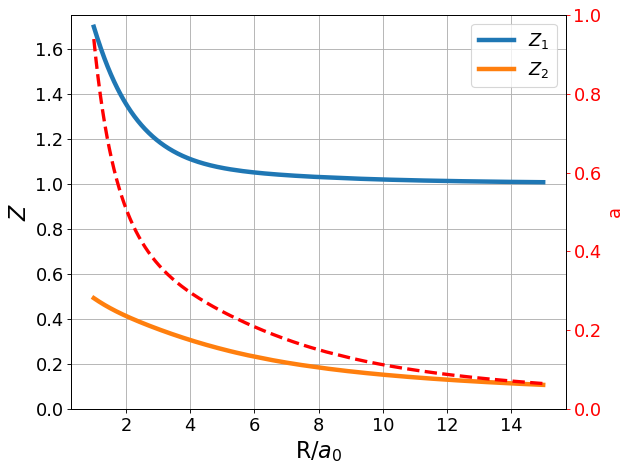

In [14]:
fiz, axes = plt.subplots(1,1,figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
fontsize=16
plt.tick_params(axis='both',labelsize=fontsize)
axes.grid(True)
axes.plot(R,min_params[:,0],lw=4,label=r'$Z_1$')
axes.plot(R,min_params[:,1],lw=4,label=r'$Z_2$')
axes.set_ylim(0,1.75)
axes.set_ylabel(r'$Z$',fontsize=20)
axes.set_xlabel(r'R/$a_0$',fontsize=20)
plt.legend(fontsize=fontsize)
ax2 = axes.twinx()
ax2.plot(R,min_params[:,2],'--', lw=3, c='r', label='a')
ax2.tick_params(labelsize=fontsize,color='r',labelcolor='r')
ax2.set_ylabel("a",color='r',fontsize=fontsize)
ax2.set_ylim(0,1)
plt.tight_layout()
plt.show();

Our expectations hold true! It is very apparent, especially for the important range for energy considerations, that $Z_{1min}$ and $Z_{2 min}$ take differing values, which means it was worthwhile after all to note them as separate variational parameters. Additionally, $a_{min}$ increases significantly near bond distance, and falls to zero as the nuclei reach infinite separation.

## 4.5.19.6. Combining the Code
As mentioned earlier, the final code cell for the energy function developed for the polarized basis set seems uncharacteristically simple on its own. Below you can find the code for all of the functions we have defined so far, nested together such that only that cell needs to be run to call upon any or all of them. \
\
A few important notes about the all-in-one code cell:
1. Inactive text is embedded in the cell by starting a new line with "#". This function was utilized for organization and to leave personal notes for orientation to the code developed along the way. These are particularly useful to translate between naming systems and seeing where functions are defined to be nested within others.
2. Some of the functions appear in a different order than they do in the notes above. The notebook has been organized such that the code cells can be run from top to bottom individually, which requires that any nested functions in a new cell be pre-defined and run in an earlier cell. This limitation does not apply in the same way for functions called from a single cell, so this is organized to represent the order in which the code was originally written.
3. Several libraries and specific tools from those libraries are imported at the beginning of the cell, then sometimes again later. Any second importing of a library or tool is redundant, but was left in to show if a certain portion of the code calls upon that library/tool (similar for some variables, like THRESH).
4. At the bottom of the cell, there is a note regarding the input of plotting code. Any/all of the plots depicted above can be generated using the all-in-one cell simply by pasting the code for an individual plot below the note. If you are interested in the coding process, try generating some of the plots, manipulate them to show different relationships and new insights (e.g. what happens to the non-optimized polarized energy plot when you change the assigned values of $Z_1$, $Z_2$, and $a$?).

In [15]:
#Welcome to the function definition, all-in-one cell. You can also think of this as your "all in one" cell.
#In this cell, all of the functions we need to define E_1s_2p are defined and nested with notes about where they come from and fit in.#
#Running this cell unchanged simply prints the minimum Energy and R that gives that energy.#
#At the bottom of this cell, you can input any/all plot codes from the plotting code cell to visualize the values of each function at given R values.#

#Start with importing a bunch of libraries just in case specific lines below do not call them#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import lpmv
from scipy.special import factorial
%matplotlib inline
from scipy.optimize import root
from scipy.optimize import minimize


#Start with <PsiA|H|PsiA> = T_AA + J_AA + J_AB + 1/R#
#write a note without changing the code
def T_AA(Z1,Z2,a): #Was KE_AA#
    return (Z1**2 + a**2 * Z2**2)/(2 * (1 + a**2))

def J_AA(Z1,Z2,a):
    return -(Z1 + 0.5*a**2*Z2)/(1+a**2)

#Need to nest functions for J_AB = <PsiA|-1/rB|PsiA>#

def J_1s(Z,R):
    w = Z*R
    return Z*(np.exp(-2*w)*(1+1/w) - 1/w)

def J_2p(Z,R):
    w = Z*R
    I1 = 2/w*np.sinh(w)
    I2 = 2/w**2 * (np.sinh(w) - w*np.cosh(w))
    I3 = 2/w**3 * (np.sinh(w)*(w**2+2) - 2*w*np.cosh(w))
    I4 = 2/w**4 * (np.sinh(w)*(3*w**2+6) - np.cosh(w)*(w**3+6*w))
    I5 = np.exp(-w)/w
    I6 = I5/w * (w + 1)
    I7 = I5/w**2 * (w**2 + 2*w + 2)
    I8 = I5/w**3 * (w**3 + 3*w**2 + 6*w + 6)
    return -Z*w**4/8 * (I5*I2 + (I1 + 2*I3)*I6 + I7*(I4 + 2*I2) + I3*I8)

def J_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    I1 = 2*np.sinh(alpha)/alpha
    I2 = 2/alpha**2*(np.sinh(alpha)-alpha*np.cosh(alpha))
    I3 = 2/alpha**3*( (alpha**2+2)*np.sinh(alpha) - 2*alpha*np.cosh(alpha) )
    I4 = np.exp(-alpha)/alpha
    I5 = (alpha+1)*np.exp(-alpha)/alpha**2
    I6 = (alpha*(alpha+2)+2)*np.exp(-alpha)/alpha**3
    return -0.25*Z1**1.5*Z2**2.5*R**3 * (I2*I4 + (I1+I3)*I5 + I2*I6)

def J_AB(Z1,Z2,a,R):
    return (J_1s(Z1,R) + 2*a*J_1s_2p(Z1,Z2,R) + a**2*J_2p(Z2,R))/(1+a**2)

#Done with function nesting for <PsiA|H|PsiA>, will call these functions at the end#

#Now, work on <PsiA|H|PsiB> = T_AB + 2*K_AB + S_AB/R#

def T_AB(Z1,Z2,a,R): #Was KE_AB#
    prefactor = -1/(1+a**2)
    kterms = Z1*K_1s(Z1,R) + a*(2*Z2*K_2p_1s(Z1,Z2,R) + Z1*K_1s_2p(Z1,Z2,R)) + 2*a**2*Z2*K_2p(Z2,R)
    sterms = 0.5 * ( Z1**2*S_1s(Z1,R) + a*(Z2**2+Z1**2)*S_1s_2p(Z1,Z2,R) + a**2*Z2**2*S_2p(Z2,R) )
    return prefactor*(kterms+sterms)

#Need to nest functions for K_AB#

THRESH=1e-8
def K_1s(Z, R):
    w = Z*R
    return -Z*np.exp(-w)*(1+w)

def K_2p(Z,R):
    w = Z*R
    I1 = np.exp(-w)*(w+1)/(w*w)
    I2 = np.exp(-w)/(w**4)*(w**3+3*w**2 + 6*w + 6)
    return -Z*w**4/8*(2*I1 - 2/3*I2)

def K_2p_1s(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z1-Z2)*R
    if abs(Z1-Z2) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2*(np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3*( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) ) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
    I4 = np.exp(-alpha)/alpha
    I5 = I4 * (alpha+1)/alpha
    I6 = I4 * (alpha*(alpha+2)+2)/alpha**2
    return -0.25*Z1**1.5*Z2**2.5*R**3*( I5*(I1+I3) - I2*(I4+I6) )

def K_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z1-Z2)*R
    if abs(Z1-Z2) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2*(np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3*( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) ) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
    I4 = np.exp(-alpha)/alpha
    I5 = I4 * (alpha+1)/alpha
    I6 = I4 * (alpha*(alpha+2)+2)/alpha**2
    return -0.25*Z1**1.5*Z2**2.5*R**3*( I5*(I1-I3) + I2*(I4-I6) )

def K_AB(Z1,Z2,a,R):
    return (K_1s(Z1,R) + a*(K_1s_2p(Z1,Z2,R) + K_2p_1s(Z1,Z2,R)) + a**2*K_2p(Z2,R))/(1+a**2)

#Done with function nesting for <PsiA|H|PsiB>, will call these functions at the end#

#Now, work on <PsiA|PsiB> = prefactor * [S_1s + 2*a*S_1s_2p + a**2*S_2p]#

THRESH = 1e-8

def S_1s(Z,R):
    w = Z*R
    return np.exp(-w)*(1+ w + w*w/3)

def S_2p(Z,R):
    w = Z*R
    return np.exp(-w)/15*(w**4 + 2*w**3 - 3*w**2 - 15*w - 15)

def S_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z2-Z1)*R
    if abs(Z2-Z1) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2 * (np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3 * ( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) )
        I4 = 2/beta**4 * ( 3*(beta**2+2)*np.sinh(beta) - beta*(beta**2 + 6)*np.cosh(beta)) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
        I4 = 0
    I5 = np.exp(-alpha)/alpha
    I6 = I5 * (alpha+1)/alpha
    I7 = I5 * (alpha*(alpha+2)+2)/alpha**2
    I8 = I5 * (alpha*(alpha*(alpha+3)+6)+ 6)/alpha**3
    return Z1**1.5*Z2**2.5*R**4/8 * (I1*I7 + I2*I8 - I3*I5 - I4*I6)

def S_AB(Z1,Z2,a,R):
    return (S_1s(Z1,R) + a**2*S_2p(Z2,R) + 2*a*S_1s_2p(Z1,Z2,R))/(1+a**2)

#Done with nesting functions for <PsiA|PsiB>, will call these functions in the end#

#Time to call our nested functions and combine them to define the energy function, E_1s_2p#

def E_1s_2p(params,R):
    Z1 = params[0]
    Z2 = params[1]
    a = params[2]
    return (T_AA(Z1,Z2,a) + J_AA(Z1,Z2,a) + J_AB(Z1,Z2,a,R) + T_AB(Z1,Z2,a,R) + 2*K_AB(Z1,Z2,a,R))/(1+S_AB(Z1,Z2,a,R)) + 1/R

#Done with defining our energy function, now let's minimize#

def E_1s_2p_to_minimize(params):
    Z1 = params[0]
    Z2 = params[1]
    a = params[2]
    R = params[3]
    return (T_AA(Z1,Z2,a) + J_AA(Z1,Z2,a) + J_AB(Z1,Z2,a,R) + T_AB(Z1,Z2,a,R) + 2*K_AB(Z1,Z2,a,R))/(1+S_AB(Z1,Z2,a,R)) + 1/R


guess = np.array([1.0,0.5,1,2.0])
min_param = minimize(E_1s_2p_to_minimize,guess).x
print("Minimum Energy of H2+ in 1s-2p polarized basis:")
print("\t Rmin = ", np.round(min_param[3],4))
print("\t Emin = ", np.round(E_1s_2p_to_minimize(min_param),4))

#Now, input functions for the other basis sets we have tried so we can compare to the polarization consideration#

def J(R):
    return np.exp(-2*R)*(1+1/R) - 1/R
def K(R):
    return -np.exp(-R)*(1+R)
def S(R):
    return np.exp(-R)*(1+ R + R*R/3)
def E(Z,R):
    T = Z**2/2-Z**2*(S(Z*R)/2 + K(Z*R))
    T /= (1+S(Z*R))
    V = -Z + Z*J(Z*R) + 2*Z*K(Z*R)
    V /= (1+S(Z*R))
    V += 1.0/R
    return T + V

E_1s_opt = np.empty(R.size)
Z_min = np.empty(R.size)
for i, r in enumerate(R):
    Z_min[i] = minimize(E,1.0,args=(r)).x[0]
    E_1s_opt[i] = E(Z_min[i],r)



#Input any plot codes below to call any of our defined functions for plotting/visualization#




Minimum Energy of H2+ in 1s-2p polarized basis:
	 Rmin =  1.9712
	 Emin =  -0.5976


## 4.5.19.7. Graphed comparisons of Polarization to LCAO and Slater bases

While comparing the expected bond distances and minimum energy values between bases is a useful endeavor, we can gleam additional insight by plotting the energy curves for each basis set and visually comparing. To do so, we will call upon older code which will allow us to define the LCAO and Slater energy functions alongside the newly-developed polarization function. 

### 4.5.19.7.1 Energy Plots

In [16]:
def J(R):
    return np.exp(-2*R)*(1+1/R) - 1/R
def K(R):
    return -np.exp(-R)*(1+R)
def S(R):
    return np.exp(-R)*(1+ R + R*R/3)
def E(Z,R):
    T = Z**2/2-Z**2*(S(Z*R)/2 + K(Z*R))
    T /= (1+S(Z*R))
    V = -Z + Z*J(Z*R) + 2*Z*K(Z*R)
    V /= (1+S(Z*R))
    V += 1.0/R
    return T + V

E_1s_opt = np.empty(R.size)
Z_min = np.empty(R.size)
for i, r in enumerate(R):
    Z_min[i] = minimize(E,1.0,args=(r)).x[0]
    E_1s_opt[i] = E(Z_min[i],r)

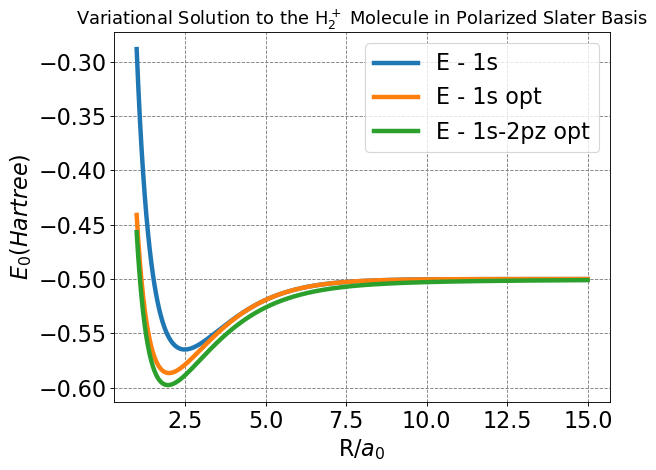

In [17]:
from scipy.optimize import minimize
R = np.arange(1,15,0.01)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
plt.plot(R,E_1s_2p_basis_a_0,lw=4, label=r'E - 1s')
plt.plot(R,E_1s_opt,lw=4, label=r'E - 1s opt')
plt.plot(R,E_1s_2p_basis_opt,lw=4, label=r'E - 1s-2pz opt')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.1)
plt.legend(fontsize=20)
plt.title(r'Variational Solution to the H$_2^+$ Molecule in Polarized Slater Basis',fontsize=16);

This is our final, and overall most important plot concerning the energy functions of the basis sets we have worked through. Note the features we have already described: lower minimum energy and bond distance. From these features, we can readily establish that the polarization model is a better approximation of the real physical nature of molecular bonding. The other major feature of this plot is how the energy of the polarized model delineates from the -0.5 Hartree expected of the $H^+$ $+$ $H$ system at a larger nuclear separation than either the LCAO or Slater, which largely track together until much closer to the estimated bond distance. This feature indicates more significant interactions between nuclei at larger separation, and is introduced by the ability of the polarized basis set to account for non-spherically symmetric orbital densities which "stretch" from one nucleus towards the other. In the LCAO or Slater bases, this "stretching" could only be achieved by increasing the diffusivity of the overall orbital outside of reasonable limits. \
\
To visualize the discussion of orbitals, let us take a look at the wavefunctions of $1s$, $2p_z$ and the combined $1s-2p_z$ developed for this model. Then, we will plot orbital densities for the LCAO, Slater, and Polarized basis sets.

### 4.5.19.7.2. Orbital Densities
First, we wil define our wavefunctions and visualize them by plotting each individual ($1s$ and $2p_z$) and the overall polarized wavefunction.

In [18]:
#That is all the code for our energy minimization, now let's move on to the wavefunction and orbital density code#

#Start with importing a bunch of libraries just in case specific lines below do not call them#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import lpmv
from scipy.special import factorial
%matplotlib inline
from scipy.optimize import root
from scipy.optimize import minimize

#Start with defining the wavefunction with the polarized basis set#

#We will need the S functions from our energy minimization code#

THRESH = 1e-8

def S_1s(Z,R):
    w = Z*R
    return np.exp(-w)*(1+ w + w*w/3)

def S_2p(Z,R):
    w = Z*R
    return np.exp(-w)/15*(w**4 + 2*w**3 - 3*w**2 - 15*w - 15)

def S_1s_2p(Z1,Z2,R):
    alpha = 0.5*(Z1+Z2)*R
    beta = 0.5*(Z2-Z1)*R
    if abs(Z2-Z1) > THRESH:
        I1 = 2*np.sinh(beta)/beta
        I2 = 2/beta**2 * (np.sinh(beta)-beta*np.cosh(beta))
        I3 = 2/beta**3 * ( (beta**2+2)*np.sinh(beta) - 2*beta*np.cosh(beta) )
        I4 = 2/beta**4 * ( 3*(beta**2+2)*np.sinh(beta) - beta*(beta**2 + 6)*np.cosh(beta)) 
    else:
        I1 = 2
        I2 = 0 
        I3 = 2/3
        I4 = 0
    I5 = np.exp(-alpha)/alpha
    I6 = I5 * (alpha+1)/alpha
    I7 = I5 * (alpha*(alpha+2)+2)/alpha**2
    I8 = I5 * (alpha*(alpha*(alpha+3)+6)+ 6)/alpha**3
    return Z1**1.5*Z2**2.5*R**4/8 * (I1*I7 + I2*I8 - I3*I5 - I4*I6)

def S_AB(Z1,Z2,a,R):
    return (S_1s(Z1,R) + a**2*S_2p(Z2,R) + 2*a*S_1s_2p(Z1,Z2,R))/(1+a**2)


#First are the 1s and 2pz functions#
def phi_1s(Z, r):
    return np.sqrt(Z**3/np.pi)*np.exp(-Z*r)
def phi_2pz(Z,r,cos_theta):
    return np.sqrt(Z**5/np.pi)*r*cos_theta*np.exp(-Z*r)

#
def h2_plus_polarized_psi2(R, params, r):
    #
    r = np.asarray(r)
    # position of nuclei are along z-axis equidistant from the origin
    RA = np.array([0,0,R/2])
    RB = np.array([0,0,-R/2])
    # determine A-dependent separation distance and angle
    rA = r-RA
    rA_mag = np.linalg.norm(rA, axis=-1)
    cosThetaA =  -rA[:,2]/rA_mag # the negative is there to make the parity work out
    # determine B-dependent separation distance and angle
    rB = r-RB
    rB_mag = np.linalg.norm(rB, axis=-1)
    cosThetaB =  rB[:,2]/rB_mag   
    # calculate psi
    Z1, Z2, a = params
    psiA = phi_1s(Z1,rA_mag) + a*phi_2pz(Z2,rA_mag,cosThetaA) 
    psiB = phi_1s(Z1,rB_mag) + a*phi_2pz(Z2,rB_mag,cosThetaB)
    psi = psiA + psiB
    # calculate normalized denisty
    psi2 = psi*psi
    psi2 /= 2*(1+S_AB(Z1,Z2,a,R))*(1+a*a)
    return psi2 

def h2_plus_polarized_psi(R, params, r):
    #
    r = np.asarray(r)
    # position of nuclei are along z-axis equidistant from the origin
    RA = np.array([0,0,R/2])
    RB = np.array([0,0,-R/2])
    # determine A-dependent separation distance and angle
    rA = r-RA
    rA_mag = np.linalg.norm(rA, axis=-1)
    cosThetaA =  -rA[:,2]/rA_mag # the negative is there to make the parity work out
    # determine B-dependent separation distance and angle
    rB = r-RB
    rB_mag = np.linalg.norm(rB, axis=-1)
    cosThetaB =  rB[:,2]/rB_mag   
    # calculate psi
    Z1, Z2, a = params
    psiA = phi_1s(Z1,rA_mag) + a*phi_2pz(Z2,rA_mag,cosThetaA) 
    psiB = phi_1s(Z1,rB_mag) + a*phi_2pz(Z2,rB_mag,cosThetaB)
    psi = psiA + psiB
    # calculate normalized denisty
    psi /= np.sqrt(2*(1+S_AB(Z1,Z2,a,R))*(1+a*a))
    return psi

def plot_polarized_psi2(R, params, ax_obj, vrange=None):
    z = np.linspace(-12,12,1200)
    x = np.linspace(-6,6,600)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    r = np.column_stack((x,y,z))
    psi2 = h2_plus_polarized_psi2(R, params, r)
    psi2 = psi2.reshape(X.shape)
    if vrange is None:
        vmax = np.amax(psi2)
        vmin = 0
    else:
        vmin = vrange[0]
        vmax = vrange[1]
    # plot
    Z1, Z2, a = params
    a = np.round(a,2)
    Z1 = np.round(Z1,2)
    Z2 = np.round(Z2,2)
    ax_obj.set_title(rf'$R={R}, a={a}, Z_1={Z1}, Z_2={Z2}$ ', fontsize=18)
    c = ax_obj.pcolormesh(Z, X, psi2, cmap='gnuplot2_r',vmin=vmin,vmax=vmax) #For regular orbital densities
    ax_obj.contour(Z, X, psi2,20,vmin=vmin,vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-12, 12, -6, 6])
    ax_obj.set_aspect('equal')
    return c


def plot_polarized_log_psi2(R, params, ax_obj, vrange=None):
    z = np.linspace(-12,12,1200)
    x = np.linspace(-6,6,600)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    r = np.column_stack((x,y,z))
    psi2 = h2_plus_polarized_psi2(R, params, r)
    psi2 = -np.log(psi2.reshape(X.shape))
    if vrange is None:
        vmax = np.amax(psi2)
        vmin = np.amin(psi2)
        print(vmin, vmax)
    else:
        vmin = vrange[0]
        vmax = vrange[1]
    # plot
    Z1, Z2, a = params
    a = np.round(a,2)
    Z1 = np.round(Z1,2)
    Z2 = np.round(Z2,2)
    ax_obj.set_title(rf'$R={R}, a={a}, Z_1={Z1}, Z_2={Z2}$ ', fontsize=18)
    c = ax_obj.pcolormesh(Z, X, psi2, cmap='gnuplot2_r',vmin=vmin,vmax=vmax) #was gnuplot2_r, for log scale orbital densities
    ax_obj.contour(Z, X, psi2,levels=np.linspace(vmin,vmax,8))
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-12, 12, -6, 6])
    ax_obj.set_aspect('equal')
    return c

def plot_polarized_psi(R, params, ax_obj, vrange=None):
    z = np.linspace(-12,12,1200)
    x = np.linspace(-8,8,600)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    r = np.column_stack((x,y,z))
    psi = h2_plus_polarized_psi(R, params, r)
    psi = psi.reshape(X.shape)
    if vrange is None:
        vmax = max(np.abs(np.amin(psi)), np.abs(np.amax(psi)))
        vmin = min(0,-vmax)
    else:
        vmin = vrange[0]
        vmax = vrange[1]
    # plot
    Z1, Z2, a = params
    a = np.round(a,2)
    Z1 = np.round(Z1,2)
    Z2 = np.round(Z2,2)
    ax_obj.set_title(rf'$R={R}, a={a}, Z_1={Z1}, Z_2={Z2}$', fontsize=18)
    c = ax_obj.pcolormesh(Z, X, psi, cmap='bwr',vmin=vmin,vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-12, 12, -8, 8])
    ax_obj.set_aspect('equal')
    return c




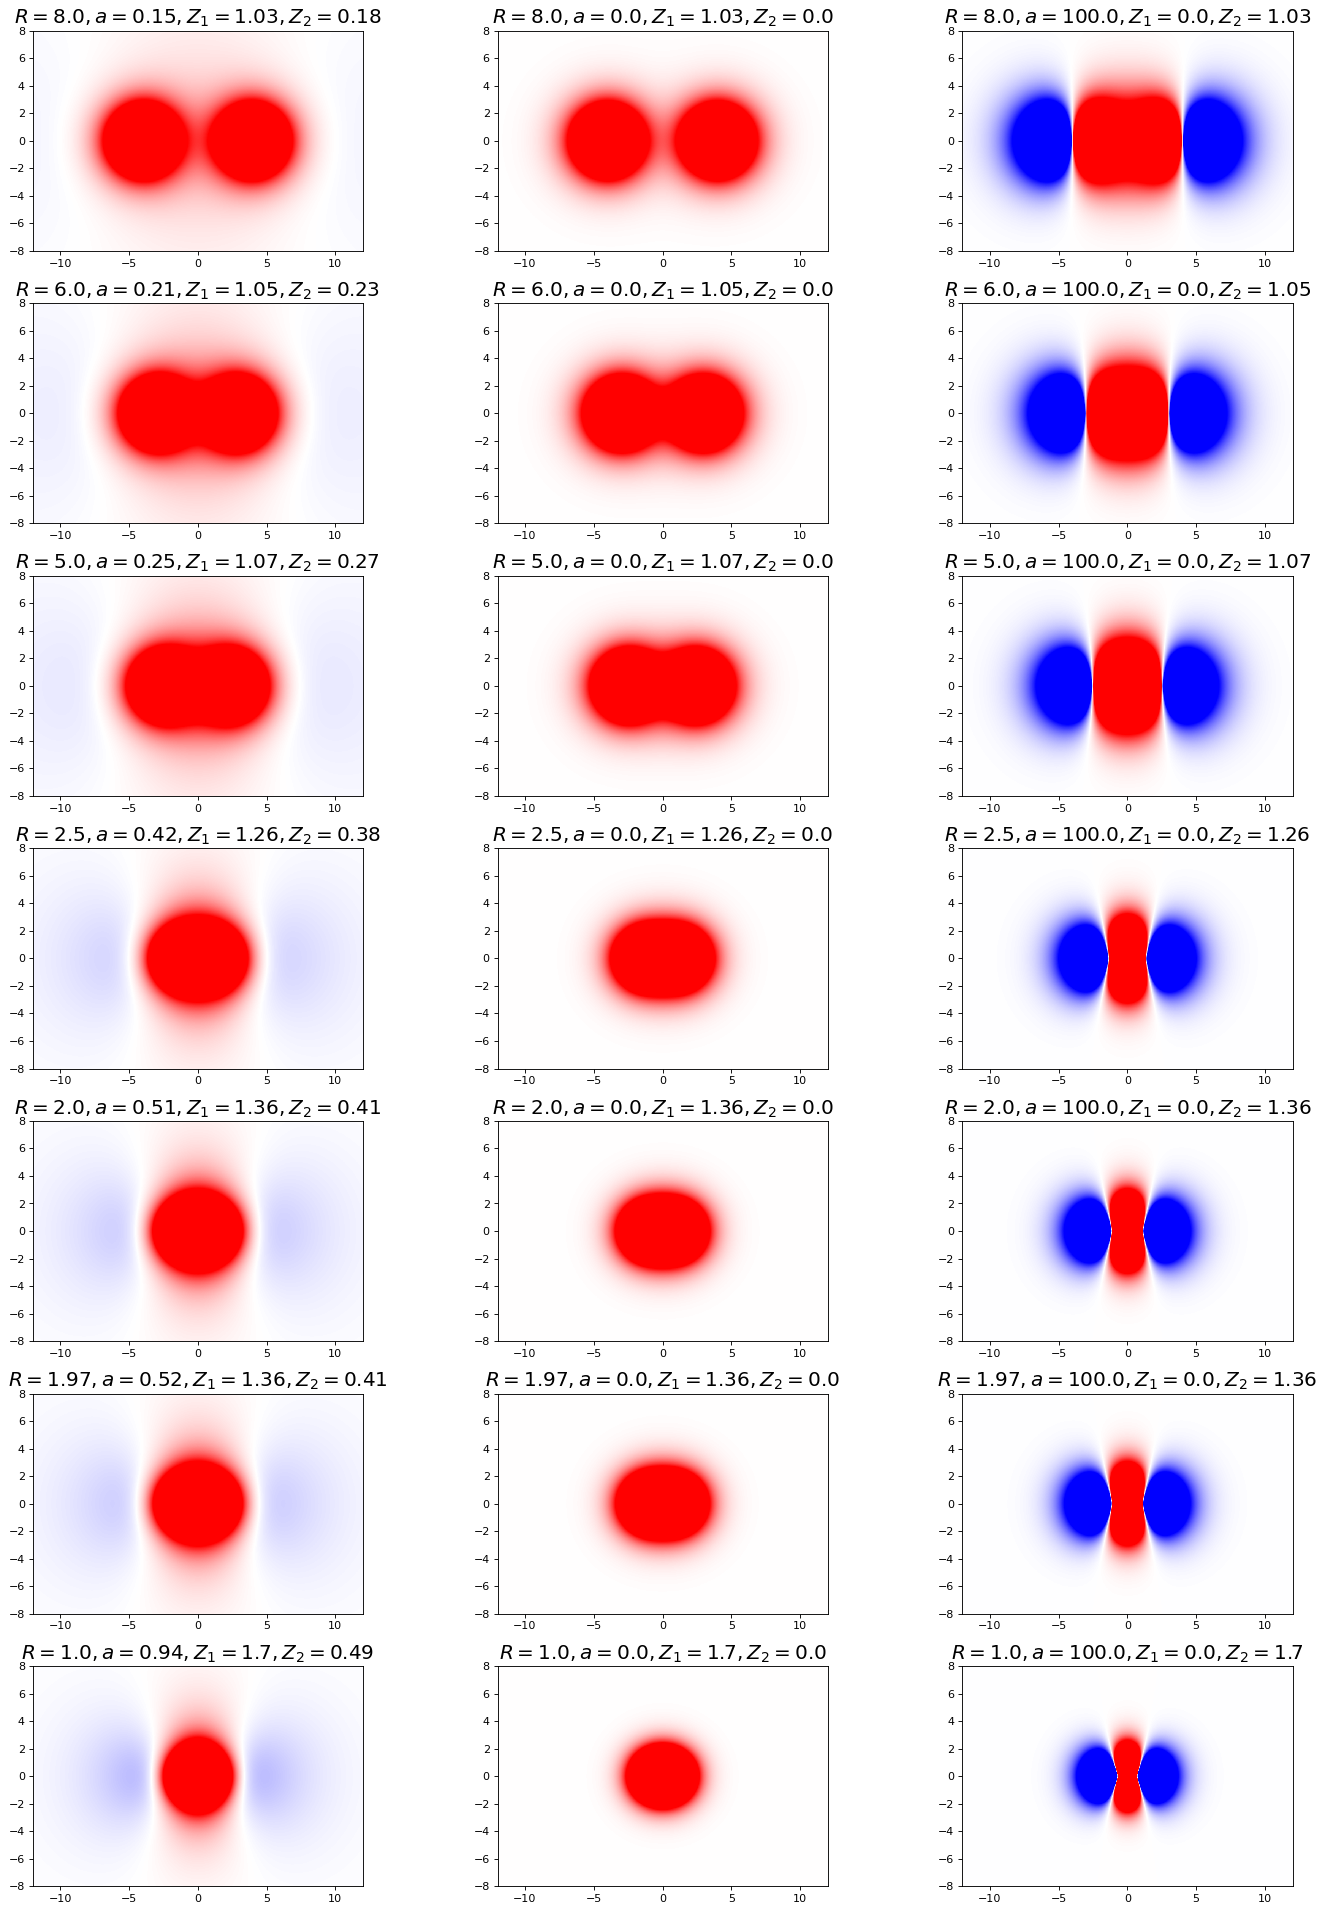

In [19]:
#Plot code for visualization of the total wavefunction, 1s contribution, and 2pz contribution#

fig, ax = plt.subplots(7,3,figsize=(18,24),dpi= 80, facecolor='w', edgecolor='k') 
R = np.array([8, 6.0, 5.0, 2.5, 2.0, 1.97, 1.0])

guess = np.array([1.0,0.5,0.1])
for i, r in enumerate(R):
    min_params = minimize(E_1s_2p,guess,args=(r)).x
    guess = min_params
    plot_polarized_psi(r, min_params, ax[i,0], vrange=[-0.02,0.02])
    Z_min = minimize(E,1.0,args=(r)).x[0]
    plot_polarized_psi(r, np.array([min_params[0],0.0,0]), ax[i,1], vrange=[-0.02,0.02])
    plot_polarized_psi(r, np.array([0.0,min_params[0],100]), ax[i,2], vrange=[-0.02,0.02])
plt.tight_layout()
plt.show();



In this figure, the plots on the left show the combined wavefunction, the middle show the $1s$, and right show the $2p_z$. Notice here that the $1s$ wavefunction is the primary contributor to the overall wavefunction, especially far from bond distance (what parameter(s) and optimized values corroborate this finding?). As we approach bond distance, the p-character increases, as we see an increase in saturation of the extra-nuclear lobes. Keep in mind the complex character of the overall wavefunction for our discussion of the orbital densities (next). Additionally, notice the shape of the red portion of the p-orbital wavefunction (remember that p-orbitals have lobes of differing parity, here denoted by the red and blue portions of the graph, separated by a node depicted in white), and how it compresses horizontally and stretches vertically as the nuclei approach bond distance.\
\
For our discussion of orbital densities, we will plot them on a negative log scale to highlight differences. They can be plotted on a linear scale as well. If you are interested in seeing those plots, see the hidden cell code just below (remember to remove the "#" before any line you want to be active). 

In [20]:
#Plot code for orbital densities (leave this line unchanged if plotting, remove "#" from all other lines)#

#fig, ax = plt.subplots(7,2,figsize=(12,18),dpi= 80, facecolor='w', edgecolor='k') 
#R = np.array([8, 6.0, 5.0, 2.5, 2.0, 1.97, 1.75])

#guess = np.array([1.0,0.5,0.1])
#for i, r in enumerate(R):
    #min_params = minimize(E_1s_2p,guess,args=(r)).x
    #guess = min_params
    #plot_polarized_psi2(r, min_params, ax[i,0], vrange=[0,0.01])
    #Z_min = minimize(E,1.0,args=(r)).x[0]
    #plot_polarized_psi2(r, np.array([Z_min,0.5,0]), ax[i,1], vrange=[0,0.01])
#plt.tight_layout()
#plt.show();


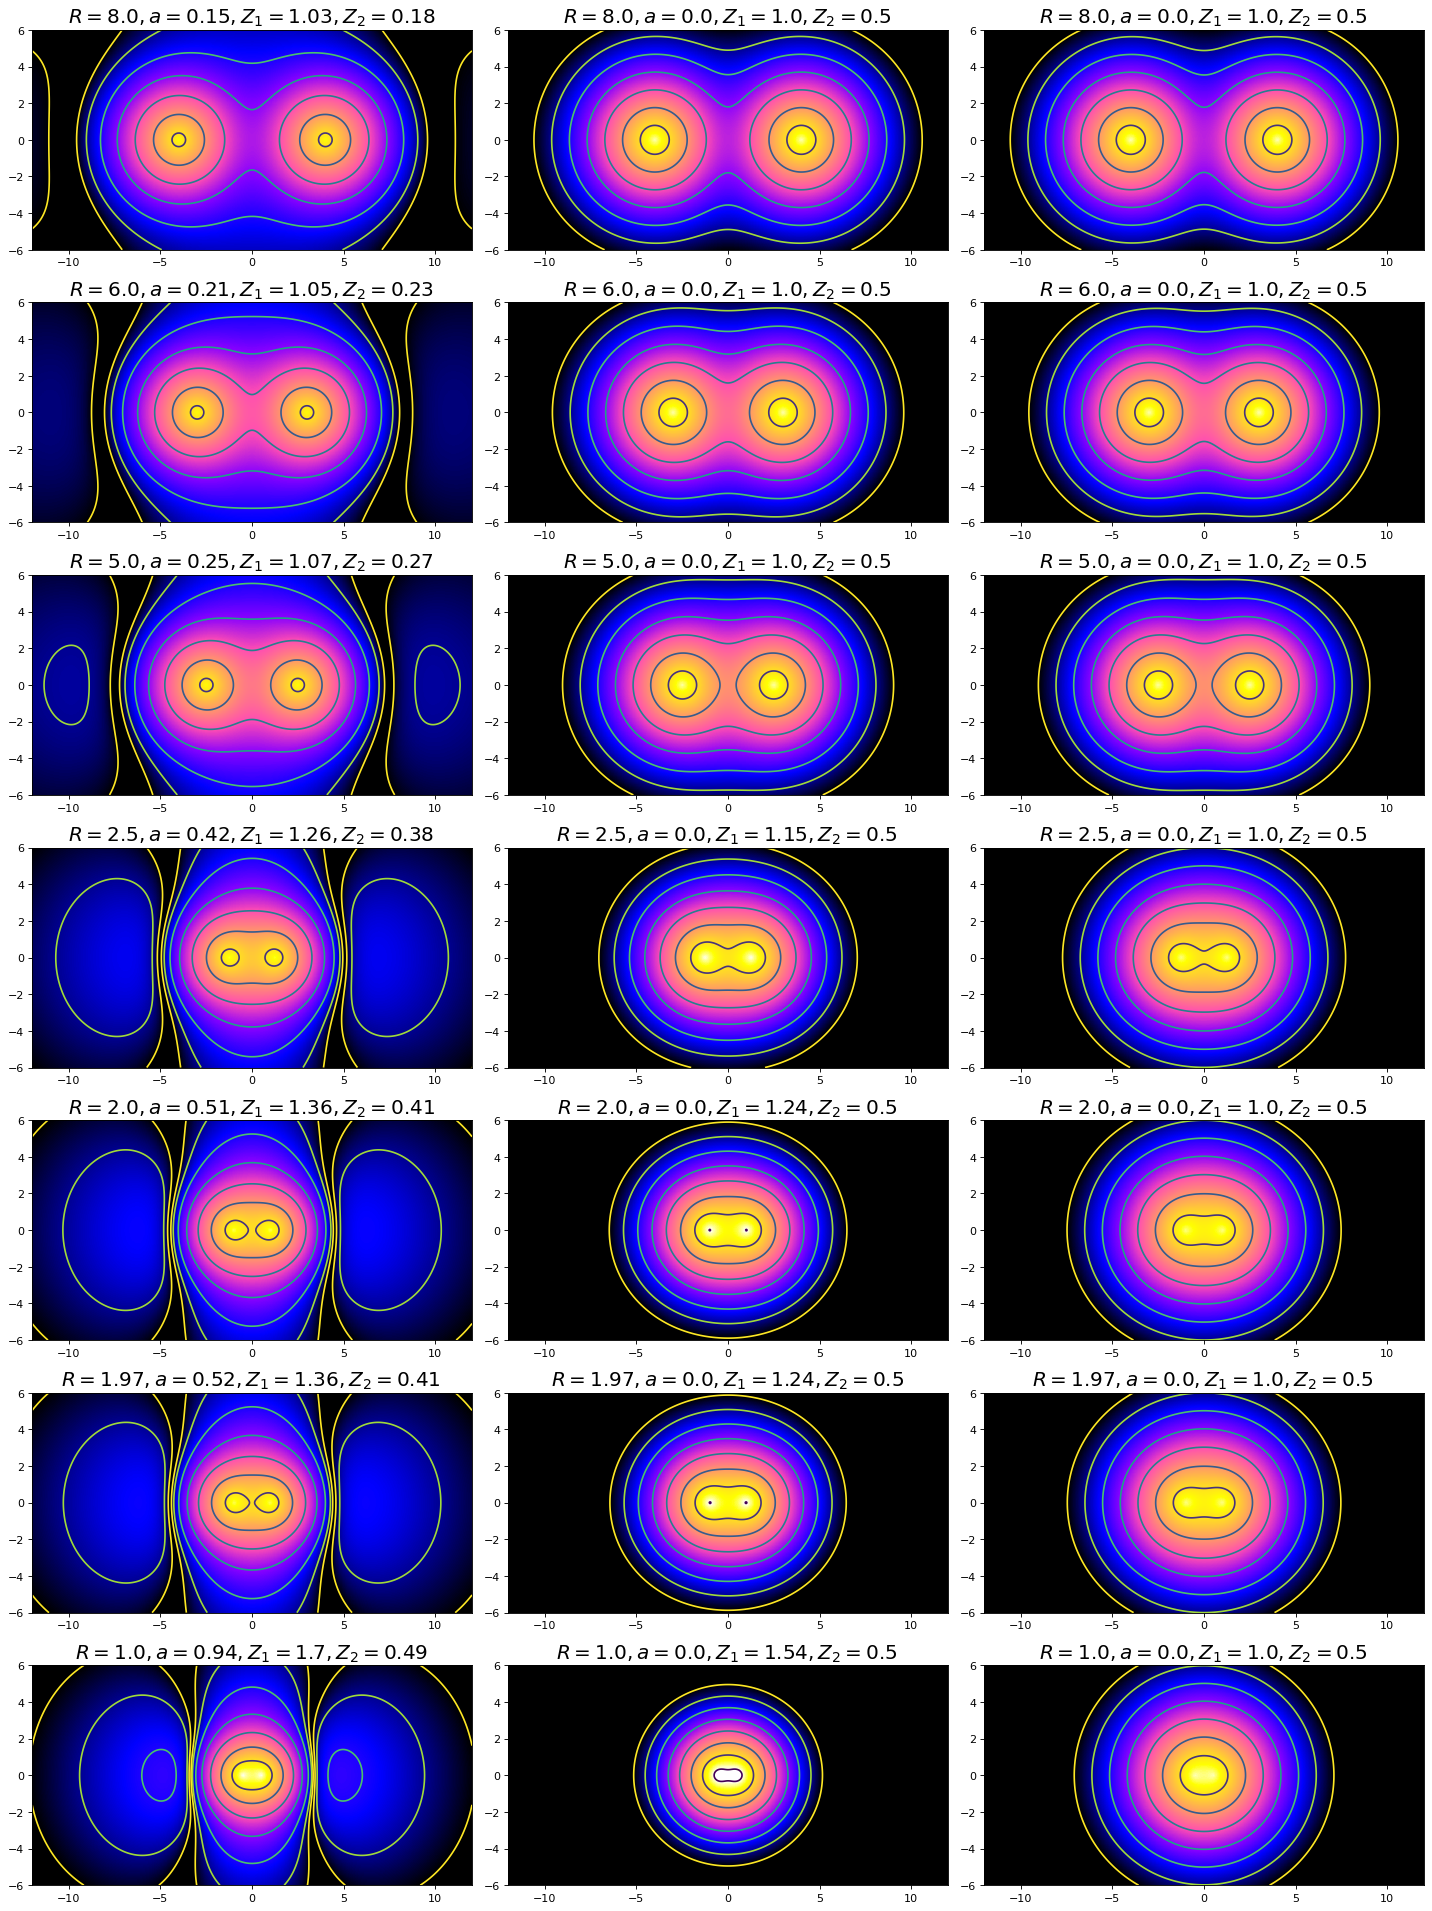

In [21]:
#Plot code for orbital densities on negative log scale#

fig, ax = plt.subplots(7,3,figsize=(18,24),dpi= 80, facecolor='w', edgecolor='k') 
R = np.array([8, 6.0, 5.0, 2.5, 2.0, 1.97, 1.0])

guess = np.array([1.0,0.5,0.1])
for i, r in enumerate(R):
    min_params = minimize(E_1s_2p,guess,args=(r)).x
    guess = min_params
    plot_polarized_log_psi2(r, min_params, ax[i,0], vrange=[0.5,15])
    Z_min = minimize(E,1.0,args=(r)).x[0]
    plot_polarized_log_psi2(r, np.array([Z_min,0.5,0]), ax[i,1], vrange=[1.50,15])
    plot_polarized_log_psi2(r, np.array([1.0,0.5,0]), ax[i,2], vrange=[1.5,15])
plt.tight_layout()
plt.show();

In this figure, the left-hand set of plots depicts the polarized $H_2^+$ model, the middle set depicts the Slater model, and the right set depicts the LCAO model (how could you have determined this from only the labels above each individual plot?). Note the characteristics we discussed from the wavefunction plots: the non-spherical distribution of density in the polarized set contrasted against the spherical symmetry of the LCAO and Slater, as well as the vertical stretching of density between nuclei. In three dimensions, the vertical stretching would appear more like a disc of electron density centered about a point directly between the nuclei. Since we have established that the polarized set gives a better energy and bond distance estimation for $H_2^+$, the model necessarily provides a better representative of the overall physical representation of a molecular bond. The structure depicted in the Polarized basis set plots may not be as intuitive as expected, given our previous experience with representations of p-orbitals and bonding. However, this visual representation can give us insight to how we might best adjust our understanding of orbital and bonding structures. The next task will be to model the $H_2$ non-ionic molecule. Take some time considering how this model might apply to that system (though the polarized set will not be covered for $H_2$ in this class). Would you expect applying polarization to the system without electron deficiency to be more or less representative of the physical reality than when applied to $H_2^+$?

## 4.5.19.8 Appendix

Functional forms for all I, L, M, N, and O functions from the S, J, and K function table.\
\
For $S_{1s-2p}$:\
\
$I_1 = 2\frac{sinh(\beta)}{\beta}$ \
$I_2 = \frac{2}{\beta^2}(sinh(\beta) - \beta cosh(\beta))$ \
$I_3 = \frac{2}{\beta^3}((\beta^2+2)sinh(\beta) - 2\beta cosh(\beta))$ \
$I_4 = \frac{2}{\beta^4}( 3(\beta^2+2)sinh(\beta) - \beta(\beta^2 + 6)cosh(/beta))$ \
$I_5 = \frac{e^{-\alpha}}{\alpha}$ \
$I_6 = I_5\frac{\alpha+1}{\alpha}$ \
$I_7 = I_5\frac{\alpha(\alpha+2)+2}{\alpha^2}$ \
$I_8 = I_5\frac{\alpha(\alpha(\alpha+3)+6)+ 6}{\alpha^3}$ \
\
For $J_{2p}$:\
\
$L_1 = \frac{2}{Z_2R}sinh(Z_2R)$\
$L_2 = \frac{2}{Z_2^2R^2}(sinh(Z_2R) - Z_2Rcosh(Z_2R))$\
$L_3 = \frac{2}{Z_2^3R^3}(sinh(Z_2R)(Z_2^2R^2+2) - 2Z_2cosh(Z_2R))$\
$L_4 = \frac{2}{Z_2^4R^4}(sinh(Z_2R)(3Z_2^2R^2+6) - cosh(Z_2R)(Z_2^3R^3+6Z_2R))$\
$L_5 = \frac{e^{-Z_2R}}{Z_2R}$\
$L_6 = \frac{L_5}{Z_2R}(Z_2R + 1)$\
$L_7 = \frac{L_5}{Z_2^2R^2}(Z_2^2R^2 + 2Z_2R + 2)$\
$L_8 = \frac{L_5}{Z_2^3R^3}(Z_2^3R^3 + 3Z_2^2R^2 + 6Z_2R + 6)$\
\
For $J_{1s-2p}$:\
\
$M_1 = \frac{2}{\alpha}sinh(\alpha)$\
$M_2 = \frac{2}{\alpha^2}(sinh(\alpha)-\alpha cosh(\alpha))$\
$M_3 = \frac{2}{\alpha^3}( (\alpha^2+2)sinh(\alpha) - 2\alpha cosh(\alpha) )$\
$M_4 = \frac{e^{-\alpha}}{\alpha}$\
$M_5 = \frac{e^{-\alpha}}{\alpha^2}(\alpha+1)$\
$M_6 = \frac{e^{-\alpha}}{\alpha^3}(\alpha(\alpha+2)+2)$\
\
For $K_{2p}$:\
\
$N_1 = \frac{e^{-Z_2R}}{Z_2^2R^2}(w+1)$\
$N_2 = \frac{e^{-Z_2R}}{Z_2^4R^4}(Z_2^3R^2+3Z_2^2R^2 + 6Z_2R + 6)$\
\
For $K_{1s-2p}$ and $K_{2p-1s}$:\
\
$P_1 = \frac{2}{\beta}sinh(\beta)$\
$P_2 = \frac{2}{\beta^2}(sinh(\beta)- \beta cosh(\beta))$\
$P_3 = \frac{2}{\beta^3}( (\beta^2+2)sinh(\beta) - 2\beta cosh(\beta) ) $\
$P_4 = \frac{e^{-\alpha}}{\alpha}$\
$P_5 = \frac{e^{-\alpha}}{\alpha^2}(\alpha+1)$\
$P_6 = \frac{e^{-\alpha}}{\alpha^2}(\alpha(\alpha+2)+2)$\
\
Any:\
\
$\alpha = 0.5(Z_1+Z_2)R$\
$\beta = 0.5(Z_2-Z_1)R$ 
